# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Natalia Zielonka

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 4

1. Wczytanie sygnałów i ich interpretacja, odczytanie częstotliwości sygnałów sinusoidalnych.
2. Transformata Fouriera jako narzędzie do analizy częstotliwościowej.
3. Decymacja i aliasing - czym jest i jak ją interpretować.
4. Przeciek widma - kiedy występuje?
5. Spektrogram jako narzędzie do analizy czasowo-częstotliwościowej.

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [4]:
% pkg install -forge signal
pkg load signal

### Zadanie 1

Na pierwszych i drugich zajęciach nauczyliśmy się ustalać częstotliwość sygnału sinusoidalnego na podstawie przebiegu czasowego. Spróbujmy zrobić to ponownie - w plikach sig_1.mat oraz sig_2.mat znajdują się zapisane sygnały. Wyrysuj ich przebieg w czasie i postaraj się odczytać częstotliwość sygnałów sinusoidalnych. Częstotliwość próbkowania wynosi $f_s=2 [kHz]$.
Czy udało Ci się w obu przypadkach rozszyfrować z jakich sygnałów sinusoidalnych składa się sygnał? Odpowiedź zapisz w komórce poniżej kodu.



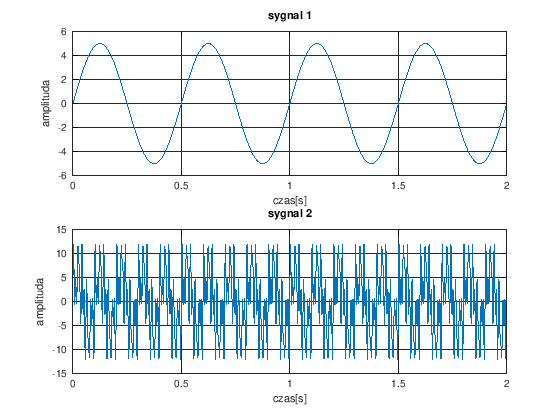

In [4]:
% tutaj jest mijesce na napisanie kodu
load("sig_1.mat");
load("sig_2.mat");
fs=2000;
x1=length(sig_1);
x2=length(sig_2);
delta_t=1/fs;
t1=0:delta_t:(x1-1)*delta_t;
t2=0:delta_t:(x2-1)*delta_t;

subplot(2,1,1);
plot(t1,sig_1);
title("sygnal 1");
xlabel("czas[s]");
ylabel("amplituda");
grid on;

subplot(2,1,2);
plot(t2,sig_2);
title("sygnal 2");
xlabel("czas[s]");
ylabel("amplituda");
grid on;


**ODPOWIEDŹ:**


TUAJ NAPISZ ODPOWIEDZ




## Transformata Fouriera

Cyfrowe sygnały mogą być analizowane w dziedzinie czasu oraz w dziedzinie częstotliwości. Algorytmy działające w dziedzinie czasu operują bezpośrednio na próbkach cyfrowego sygnału. Analiza częstotliwościowa sygnału, stosowana w wielu operacjach cyfrowego przetwarzania sygnałów, polega na przekształceniu sygnału z dziedziny czasu do dziedziny częstotliwości. Widmo sygnału (ang. spectrum) to reprezentacja częstotliwościowa sygnału, często mówi się więc o analizie widmowej.

Jean-Baptiste Joseph Fourier odkrył, że dowolny sygnał okresowy można przedstawić w postaci szeregu Fouriera, czyli sumy sygnałów trygonometrycznych (kosinusów i sinusów) o różnych amplitudach i częstotliwościach. Operację przekształcenia sygnału z dziedziny czasu do dziedziny częstotliwości nazywa się przekształceniem (transformacją) Fouriera (Fourier transform). Wynik tej operacji, czyli częstotliwościową reprezentację sygnału, nazywa się transformatą Fouriera. W przypadku sygnałów dyskretnych (cyfrowych) mówimy o dyskretnym przekształceniu Fouriera (DFT - Discrete Fourier Transform). W praktyce zwykle nie oblicza się transformaty z definicji, stosuje się np. algorytm szybkiego przekształcenia Fouriera (FFT - Fast Fourier Transform).

Na podstawie N próbek sygnału otrzymujemy N wartości widmowych, pokrywających zakres od 0 do  fs , gdzie  fs  jest częstotliwością próbkowania, a  fs/2  jest częstotliwością Nyquista.


W naszym przypadku korzystać będziemy z funkcji **fft( )** do obliczenia transformaty oraz funkcji **stem( )** do jej wyrysowania.

### Zadanie 2

Oblicz transformatę Fouriera dla wczytanych wcześniej sygnałów oraz wyrysuj jej widmo amplitudowe.

Chcemy uzyskać dwa podwójne wykresy - na każdym z nich będziemy mieć sygnał w czasie, a pod nim wyrysowane widmo. Czy jesteśmy w stanie odczytać z jakich składowych sinusoidalnych składa się nasz sygnał?





In [5]:
% help fft
% help abs
% helpo stem

In [2]:
% tutaj jest miejsce na napisanie kodu
load('sig_1.mat');
fs=2000;
delta_t=1/fs;
p1=length(sig_1);
t1=0:delta_t:(p1-1)*delta_t;

fft_sig1=fft(sig_1);
abs_fft_sig1=abs(fft_sig1);
f_step1=fs/length(fft_sig1);
f=0:f_step1:fs-f_step1;

subplot(2,1,1);
plot(t1,sig_1);
xlabel("czas[s]");
ylabel("amplituda");

subplot(2,1,2);
stem(f,abs_fft_sig1);
xlabel("czestotliwosc[Hz]");
ylabel("omega");



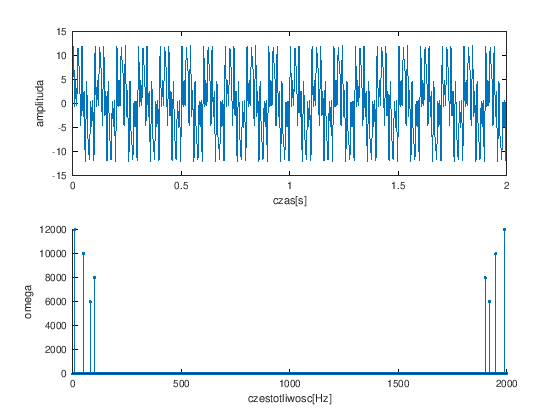

In [3]:
load('sig_2.mat');
fs2=2000;
delta_t2=1/fs2;
p2=length(sig_2);
t2=0:delta_t2:(p1-1)*delta_t2;

fft_sig2=fft(sig_2);
abs_fft_sig2=abs(fft_sig2);
f_step2=fs2/length(fft_sig2);
f2=0:f_step2:fs2-f_step2;

subplot(2,1,1);
plot(t1,sig_2);
xlabel("czas[s]");
ylabel("amplituda");

subplot(2,1,2);
stem(f,abs_fft_sig2,'.');
xlabel("czestotliwosc[Hz]");
ylabel("omega");

### Zadanie 3

Analiza częstotliwościowa szumu - sprawdźmy z jakich składowych sinusoidalnych składają się poszczególne szumy. W tym celu:
1. Za pomocą funkcji **`load`** wczytujemy dwa pliki z szumem do naszego programu. Nazwy zmiennych są tożsame z nazwami pliku (czyli po wykonaniu load mamy w programie dostępne zmienne `szum_1` oraz `szum_2`).
2. Generujemy wektor czasu dla naszego sygnału. Częstotliwość próbkowania wynosi $f_s=500[Hz]$, natomiast długość sygnału w próbkach (czyli długość wektora) można sprawdzić za pomocą funkcji **`length()`**. Dla ułatwienia szumy zostały zapisane z taką samą częstotliwością próbkowania i mają tyle samo próbek, więc wystarczy nam jeden wektor czasu.
2. Rysujemy pierwszy potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_1 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał 20 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
3. Rysujemy drugi potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_2 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał tym razem 10 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
4. Uruchamiamy komórkę i poprawiamy tytuły wykresów  (`title()`) na takie, które będą związane z rodzajem wyrysowanego szumu.


In [3]:
% dokumentacja do wykorzystywanych funkcji. Aby ją zobaczyć należy odkomentować linijkę która aktualnie Was interesuje
% help load
% help hist
% help fft
% help stem

In [5]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_1
load('szum_1.mat');
fs=500;
delta_t=1/fs;
p=length(szum_1);
t=0:delta_t:(p-1)*delta_t;
f_step=fs/p;
f=0:f_step:fs-f_step;
fft_sig1=fft(szum_1);
abs_fft_sig1=abs(fft_sig1);

figure
subplot(3,1,1);
plot(t,szum_1);
title("szum 1 w czasie");

subplot(3,1,2);
hist(szum_1,20);
title("szum 1 histogram");

subplot(3,1,3);
stem(f,fft_sig1);
title("szum 1 w czestotliwosci");


In [10]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_2
load("szum_2.mat");
fs=500;
delta_t=1/fs;
p=length(szum_2);
t=0:delta_t:(p-1)*delta_t;
f_step=fs/p;
f=0:f_step:fs-f_step;

fft_sig2=fft(szum_2);

abs_fft_sig2=abs(fft_sig2);

figure

subplot(3,1,1);
plot(t,szum_2);
title("szum 2 w czasie");

subplot(3,1,2);
hist(szum_2,10);
title("szum 2 histogram");

subplot(3,1,3);
stem(f,fft_sig2);
title("szum 2 w czestotliwosci");


### Zadanie 5

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy poprzednim temacie. Pamiętaj o opisaniu wykresu! Skorzystaj z pierwszego pola w funkcji _subplot()_ - będziemy chcieli mieć dwa wykresy pod sobą (dwa wiersze, jedna kolumna).

Na drugim wykresie wyrysuj widmo amplitudowe tego sygnału. Co na jego podstawie możesz powiedzieć? Co jesteś w stanie powiedzieć na temat częstotliwości maksymalnej sygnału w stosunku do częstotliwości próbkowania?



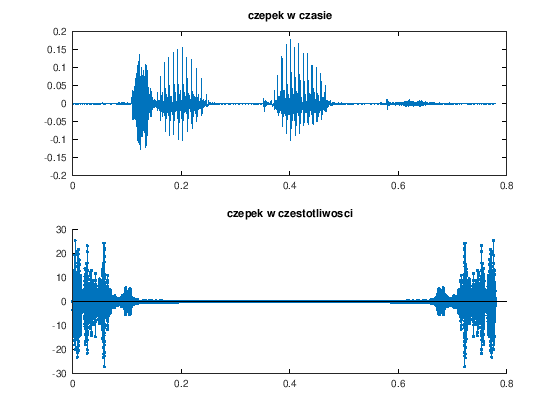

In [1]:
% tuaj jest miejsce na kod
[y,Fs]=audioread('czepek.wav');
t=(0:size(y-1)-1)/Fs;

f_step=Fs/length(y);
f=0:f_step:Fs-f_step;

fft_sig=fft(y);

figure
subplot(2,1,1);
plot(t,y);
title("czepek w czasie");

subplot(2,1,2);
stem(t,fft_sig,'.');
title("czepek w czestotliwosci");


**ODPOWIEDŹ**: 

TUTAJ ZAPISZ ODPOWIEDŹ

## Decymacja

Czym jest decymacja? Na podstawie tego co usłyszałeś zapisz definicję zrozumiałą dla Ciebie :)

**Decymacja** - zmniejszenie częstotliwości próbkowania


### Zadanie 6

Przeanalizuj wczytane dzisiaj sygnały (sig_1, sig_2 oraz czepek) - czy możemy wykonać ich decymację? Jeśli tak to jakiego rzędu? Przeprowadź decymację sygnałów w których jest to możliwe. Za każdym razem wyrysuj przebieg czasowy i widmo amplitudowe przed decymacją oraz po niej. Czy coś się zmieniło na widmie? Przeanalizuj i opisz co dokładnie widzisz. Opisz wnioski ze swojego eksperymentu w polu odpowiedź.

Do wykonania decymacji użyj funkcji **decimate()**.

In [4]:
% tutaj jest miejesce na napisanie kodu







**Odpowiedź:**




___